<a href="https://colab.research.google.com/github/siddhartha18101/Covid-19/blob/master/melspec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!ls


drive  sample_data


In [0]:
cd ..


/


In [0]:
%cd drive/

[Errno 2] No such file or directory: 'drive/'
/


In [0]:
!ls

bin					   etc	  opt	 sys
boot					   home   proc	 tensorflow-1.15.2
content					   lib	  root	 tmp
datalab					   lib32  run	 tools
dev					   lib64  sbin	 usr
dlib-19.18.0-cp27-cp27mu-linux_x86_64.whl  media  srv	 var
dlib-19.18.0-cp36-cp36m-linux_x86_64.whl   mnt	  swift


In [0]:
%cd /content/drive/My Drive/Corona/Validation

/content/drive/My Drive/Corona/Validation


In [0]:
!ls

cough.mp3  cough.wav  sneeze.png


In [0]:
# load python libraries
%matplotlib inline
import numpy as np
import pandas as pd
import random
from scipy.io import wavfile
from sklearn.preprocessing import scale
import librosa.display
import librosa
import matplotlib.pyplot as plt
import os


In [0]:
def save_melspectrogram(directory_path, file_name, dataset_split, label, sampling_rate=44100):
    """ Will save spectogram into current directory"""
    
    path_to_file = os.path.join(directory_path, file_name)
    data, sr = librosa.load(path_to_file, sr=sampling_rate, mono=True)
    data = scale(data)
    rate = 0.002
    data = data + rate*np.random.randn(len(data))  # Adding white noise


    melspec = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128)
    # Convert to log scale (dB) using the peak power (max) as reference
        # per suggestion from Librbosa: https://librosa.github.io/librosa/generated/librosa.feature.melspectrogram.html
    log_melspec = librosa.power_to_db(melspec, ref=np.max)  
    librosa.display.specshow(log_melspec, sr=sr)
    
    # create saving directory
    directory = './melspectrograms/validation/{dataset}/{label}'.format(dataset=dataset_split, label=label)
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    plt.savefig(directory + '/' + file_name.strip('.wav') + '.png')

def _train_test_split(filenames, train_pct):
    """Create train and test splits for ESC-50 data"""
    random.seed(2018)
    n_files = len(filenames)
    n_train = int(n_files*train_pct)
    train = np.random.choice(n_files, n_train, replace=False)
        
    # split on training indices
    training_idx = np.isin(range(n_files), train)
    training_set = np.array(filenames)[training_idx]
    testing_set = np.array(filenames)[~training_idx]
    print ('\tfiles in training set: {}, files in testing set: {}').format(len(training_set), len(testing_set))
    
    return {'training': training_set, 'testing': testing_set}

In [0]:
dataset_dir = '/content/drive/My Drive/CovidData'

# Load meta data for audio files
meta_data = pd.read_csv(dataset_dir + '/meta/esc50.csv')

labs = meta_data.category
unique_labels = labs.unique()
meta_data.head()

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


In [0]:
unique_labels

array(['dog', 'chirping_birds', 'vacuum_cleaner', 'thunderstorm',
       'door_wood_knock', 'can_opening', 'crow', 'clapping', 'fireworks',
       'chainsaw', 'airplane', 'mouse_click', 'pouring_water', 'train',
       'sheep', 'water_drops', 'church_bells', 'clock_alarm',
       'keyboard_typing', 'wind', 'footsteps', 'frog', 'cow',
       'brushing_teeth', 'car_horn', 'crackling_fire', 'helicopter',
       'drinking_sipping', 'rain', 'insects', 'laughing', 'hen', 'engine',
       'breathing', 'crying_baby', 'hand_saw', 'coughing',
       'glass_breaking', 'snoring', 'toilet_flush', 'pig',
       'washing_machine', 'clock_tick', 'sneezing', 'rooster',
       'sea_waves', 'siren', 'cat', 'door_wood_creaks', 'crickets'],
      dtype=object)

In [0]:
new_dir = '/content/drive/My Drive/Corona/Augmentation'

Proccesing breathing audio files
	files in training set: 32, files in testing set: 8


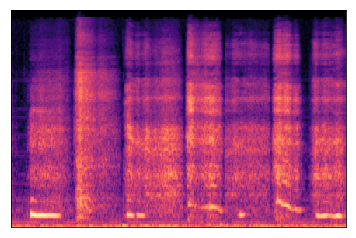

In [0]:
# for label in unique_labels:
label = 'breathing'
print "Proccesing {} audio files".format(label)
current_label_meta_data = meta_data[meta_data.category == label]
datasets = _train_test_split(current_label_meta_data.filename, train_pct=0.8)
for dataset_split, audio_files in datasets.iteritems():
      for filename in audio_files:
            directory_path = dataset_dir + '/audio/'
            save_melspectrogram(directory_path, filename, dataset_split, label, sampling_rate=44100)
        

Proccesing snoring audio files
	files in training set: 32, files in testing set: 8


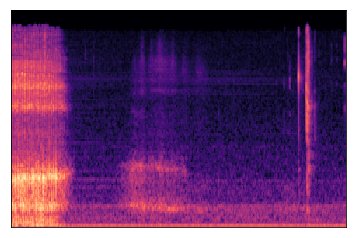

In [0]:

# for label in unique_labels:
label = 'snoring'
print "Proccesing {} audio files".format(label)
current_label_meta_data = meta_data[meta_data.category == label]
datasets = _train_test_split(current_label_meta_data.filename, train_pct=0.8)
for dataset_split, audio_files in datasets.iteritems():
      for filename in audio_files:
            directory_path = dataset_dir + '/audio/'
            save_melspectrogram(directory_path, filename, dataset_split, label, sampling_rate=44100)
        

Proccesing coughing audio files
	files in training set: 32, files in testing set: 8


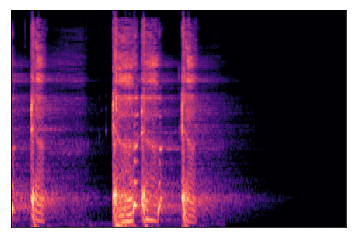

In [0]:
# for label in unique_labels:
label = 'coughing'
print "Proccesing {} audio files".format(label)
current_label_meta_data = meta_data[meta_data.category == label]
datasets = _train_test_split(current_label_meta_data.filename, train_pct=0.8)
for dataset_split, audio_files in datasets.iteritems():
      for filename in audio_files:
            directory_path = dataset_dir + '/audio/'
            save_melspectrogram(directory_path, filename, dataset_split, label, sampling_rate=44100)
        

Proccesing sneezing audio files
	files in training set: 32, files in testing set: 8


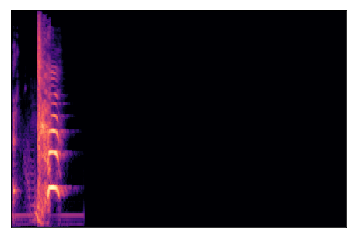

In [0]:
# for label in unique_labels:
label = 'sneezing'
print "Proccesing {} audio files".format(label)
current_label_meta_data = meta_data[meta_data.category == label]
datasets = _train_test_split(current_label_meta_data.filename, train_pct=0.8)
for dataset_split, audio_files in datasets.iteritems():
      for filename in audio_files:
            directory_path = dataset_dir + '/audio/'
            save_melspectrogram(directory_path, filename, dataset_split, label, sampling_rate=44100)
        

Proccesing brushing_teeth audio files
	files in training set: 32, files in testing set: 8


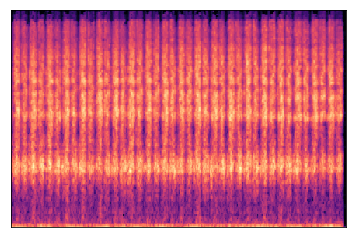

In [0]:
# for label in unique_labels:
label = 'brushing_teeth'
print "Proccesing {} audio files".format(label)
current_label_meta_data = meta_data[meta_data.category == label]
datasets = _train_test_split(current_label_meta_data.filename, train_pct=0.8)
for dataset_split, audio_files in datasets.iteritems():
      for filename in audio_files:
            directory_path = dataset_dir + '/audio/'
            save_melspectrogram(directory_path, filename, dataset_split, label, sampling_rate=44100)
        

Proccesing drinking_sipping audio files
	files in training set: 32, files in testing set: 8


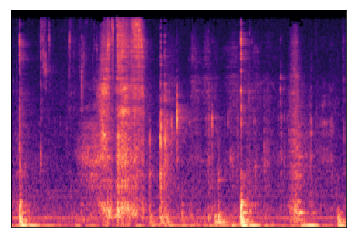

In [0]:
# for label in unique_labels:
label = 'drinking_sipping'
print "Proccesing {} audio files".format(label)
current_label_meta_data = meta_data[meta_data.category == label]
datasets = _train_test_split(current_label_meta_data.filename, train_pct=0.8)
for dataset_split, audio_files in datasets.iteritems():
      for filename in audio_files:
            directory_path = dataset_dir + '/audio/'
            save_melspectrogram(directory_path, filename, dataset_split, label, sampling_rate=44100)
        

In [0]:
# data augmentation: stretch sound
def stretch_sound(x, rate=1.1):
    input_length = len(x)
    x = librosa.effects.time_stretch(x, rate)
    if len(x)>input_length:
        return x[:input_length]
    else:
        return np.pad(x, (0, max(0, input_length - len(x))), "constant")

In [0]:
save_melspectrogram(/content/drive/My Drive/Corona/Validation, filename, dataset_split, label, sampling_rate=44100)
